In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from prophet import Prophet
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('time_series/Data/BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [11]:
df.columns = ['ds','y'] #prophet takes datetime in ds and label in y format
df

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [12]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [19]:
m = Prophet()
m.fit(df)

22:25:12 - cmdstanpy - INFO - Chain [1] start processing
22:25:12 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selec

In [22]:
#placeholder to hold our future predictions, prophet by deafult expects daily data
future = m.make_future_dataframe(periods=24, freq='MS')
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [23]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [25]:
len(df), len(future)

(324, 348)

In [27]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.898400,1152.723879,1469.508967,1772.898400,1772.898400,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,0.0,0.0,0.0,1311.043734
1,1992-02-01,1775.730691,1179.130473,1503.840115,1775.730691,1775.730691,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,0.0,0.0,0.0,1348.171720
2,1992-03-01,1778.380254,1432.383063,1754.891407,1778.380254,1778.380254,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,0.0,0.0,0.0,1599.177870
3,1992-04-01,1781.212546,1415.381173,1740.803111,1781.212546,1781.212546,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,0.0,0.0,0.0,1584.963880
4,1992-05-01,1783.953473,1659.598058,1985.041036,1783.953473,1783.953473,45.147907,45.147907,45.147907,45.147907,45.147907,45.147907,0.0,0.0,0.0,1829.101380


In [28]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4466.925511,4793.083623,4628.441552
337,2020-02-01,4527.796323,4829.770161,4678.807340
338,2020-03-01,4785.277496,5104.784988,4942.197241
339,2020-04-01,4776.253261,5112.649937,4941.221054
340,2020-05-01,5039.377695,5358.376734,5198.169330
341,2020-06-01,5020.839021,5338.224372,5179.161700
342,2020-07-01,5154.062362,5468.306718,5311.678492
343,2020-08-01,5084.716860,5402.187377,5240.959670
344,2020-09-01,4921.310337,5242.514226,5083.866806
345,2020-10-01,5025.354270,5360.330994,5189.045546


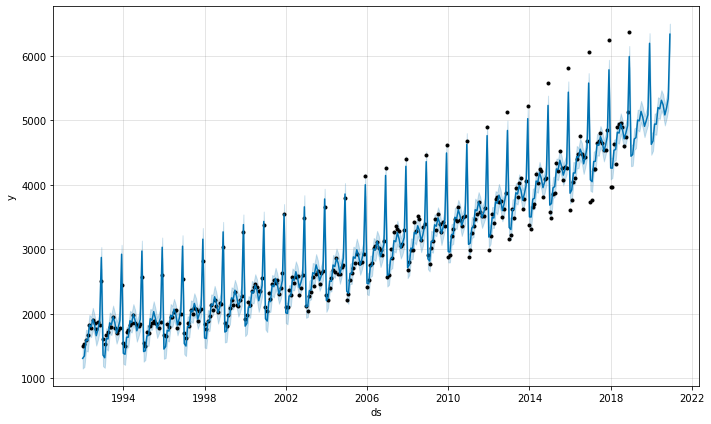

In [31]:
m.plot(forecast);

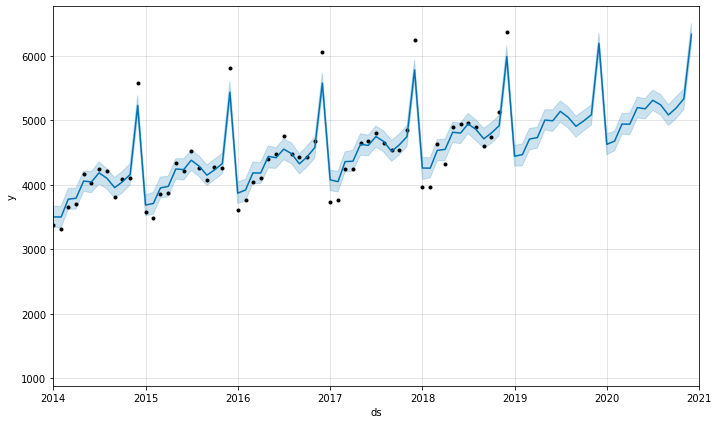

In [40]:
m.plot(forecast)
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2021-01-01'));

<AxesSubplot:xlabel='ds'>

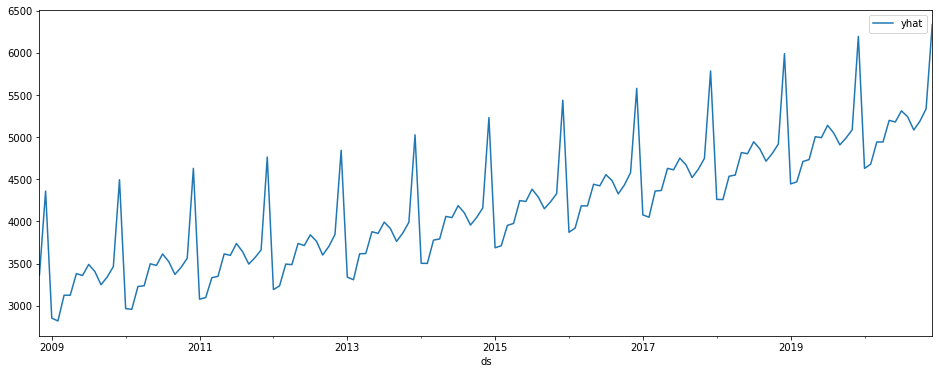

In [49]:
forecast.loc['2014-01-01':].plot(x='ds', y='yhat', figsize=(16,6))

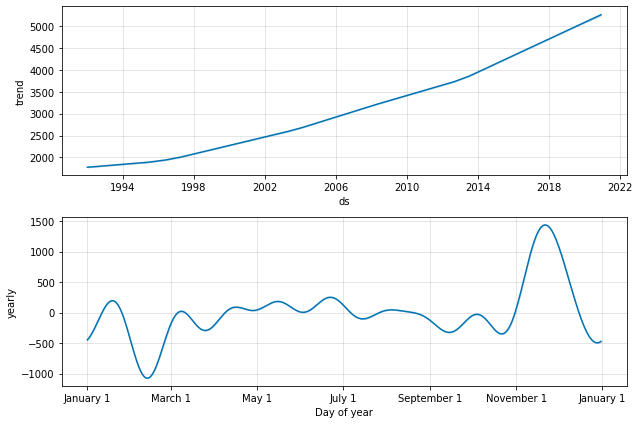

In [51]:
m.plot_components(forecast);

In [52]:
df = pd.read_csv('time_series/Data/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [57]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [64]:
df.tail(5)

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


<AxesSubplot:xlabel='ds'>

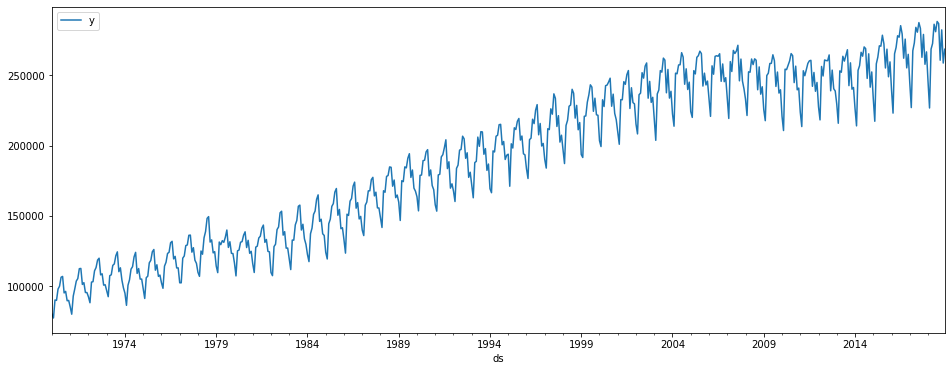

In [59]:
df.plot(x='ds', y='y', figsize=(16,6))

In [60]:
len(df)

588

In [61]:
train = df.iloc[:576]
test = df.iloc[576:]

In [63]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
forecast.tail(5)

23:12:05 - cmdstanpy - INFO - Chain [1] start processing
23:12:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263259.631706,274133.308973,285965.521762,263199.230932,263274.157378,16449.550366,16449.550366,16449.550366,16449.550366,16449.550366,16449.550366,0.0,0.0,0.0,279709.182072
584,2018-09-01,263398.341584,255887.316490,267269.746718,263303.089197,263429.864274,-1667.533350,-1667.533350,-1667.533350,-1667.533350,-1667.533350,-1667.533350,0.0,0.0,0.0,261730.808234
585,2018-10-01,263532.576949,262708.348004,274923.390006,263412.093553,263583.821406,5309.074263,5309.074263,5309.074263,5309.074263,5309.074263,5309.074263,0.0,0.0,0.0,268841.651212
586,2018-11-01,263671.286826,249828.875636,261086.082350,263521.367871,263738.164790,-8205.142435,-8205.142435,-8205.142435,-8205.142435,-8205.142435,-8205.142435,0.0,0.0,0.0,255466.144392
587,2018-12-01,263805.522192,250720.327577,262640.480158,263611.865417,263894.055019,-6918.629429,-6918.629429,-6918.629429,-6918.629429,-6918.629429,-6918.629429,0.0,0.0,0.0,256886.892763


In [67]:
future.tail()

,ds
583,2018-08-01
584,2018-09-01
585,2018-10-01
586,2018-11-01
587,2018-12-01


<AxesSubplot:xlabel='ds'>

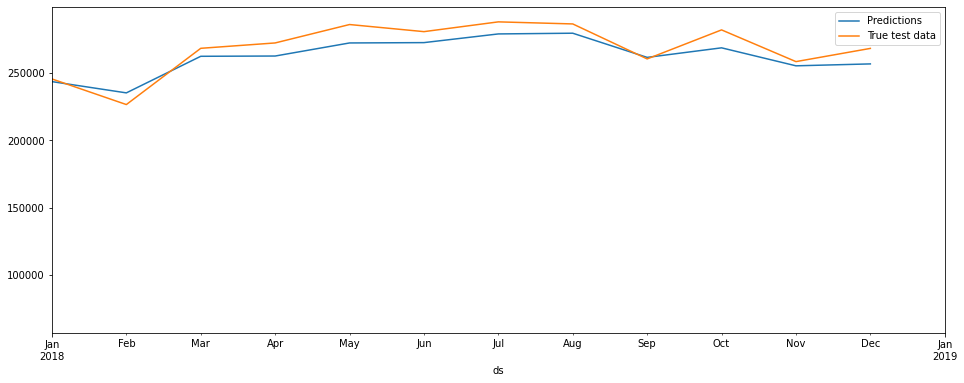

In [76]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(16,6))
test.plot(x='ds', y='y', label='True test data', legend=True,ax =ax, xlim=('2018-01-01','2019-01-01'))

In [77]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243718.687623
577    235346.300721
578    262547.147937
579    262745.730889
580    272466.972940
581    272717.536061
582    279174.637816
583    279709.182072
584    261730.808234
585    268841.651212
586    255466.144392
587    256886.892763
Name: yhat, dtype: float64

In [78]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [79]:
rmse(predictions,test['y'])

8723.114585667272

In [84]:
test.mean()

y    268739.666667
dtype: float64

In [86]:
#prophet cross validation for model evaluation
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

#Initial training period
initial = 5*365 #for 5 years
initial = str(initial) + ' days'

#Period length for CV
period = 5*365
period = str(period) + ' days'

#Horizon for forecast for each fold(period)
horizon = 365 #1 year ahead
horizon = str(horizon) + ' days'

df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

  0%|          | 0/9 [00:00<?, ?it/s]23:33:13 - cmdstanpy - INFO - Chain [1] start processing
23:33:14 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 1/9 [00:00<00:07,  1.03it/s]23:33:14 - cmdstanpy - INFO - Chain [1] start processing
23:33:14 - cmdstanpy - INFO - Chain [1] done processing
 22%|██▏       | 2/9 [00:01<00:03,  1.77it/s]23:33:14 - cmdstanpy - INFO - Chain [1] start processing
23:33:15 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 3/9 [00:01<00:02,  2.18it/s]23:33:15 - cmdstanpy - INFO - Chain [1] start processing
23:33:15 - cmdstanpy - INFO - Chain [1] done processing
 44%|████▍     | 4/9 [00:01<00:01,  2.55it/s]23:33:15 - cmdstanpy - INFO - Chain [1] start processing
23:33:15 - cmdstanpy - INFO - Chain [1] done processing
 56%|█████▌    | 5/9 [00:02<00:01,  2.63it/s]23:33:16 - cmdstanpy - INFO - Chain [1] start processing
23:33:16 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 6/9 [00:02<00:01,  2.83it/s]23:33:16 - cmds

In [94]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.056712,107192.254039,109950.744686,102445.0,1976-12-11
1,1977-02-01,102996.080620,101499.823955,104478.918241,102416.0,1976-12-11
2,1977-03-01,118973.287825,117531.921474,120404.621406,119960.0,1976-12-11
3,1977-04-01,120612.896843,119171.075015,122089.232997,121513.0,1976-12-11
4,1977-05-01,127882.997333,126457.592128,129312.383549,128884.0,1976-12-11


In [90]:
len(df_cv)

108

In [95]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.392620e+07,4891.441802,4495.785193,0.027551,0.023503,0.027137,0.4
1,53 days,2.139317e+07,4625.274740,4225.237984,0.024757,0.023503,0.024464,0.4
2,54 days,1.799877e+07,4242.495209,3700.027719,0.019866,0.022254,0.019710,0.5
3,55 days,2.263701e+07,4757.836906,4206.850433,0.022844,0.023503,0.022603,0.4
4,57 days,2.060908e+07,4539.722156,3958.035585,0.021211,0.022254,0.021007,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.815642e+07,4261.035516,3740.132970,0.019540,0.019440,0.019550,0.5
95,361 days,1.727838e+07,4156.726773,3460.297498,0.018146,0.018944,0.018166,0.5
96,362 days,3.151940e+07,5614.213845,4379.294087,0.021916,0.024308,0.021817,0.4
97,364 days,2.970923e+07,5450.617688,4208.599878,0.021275,0.021428,0.021190,0.5


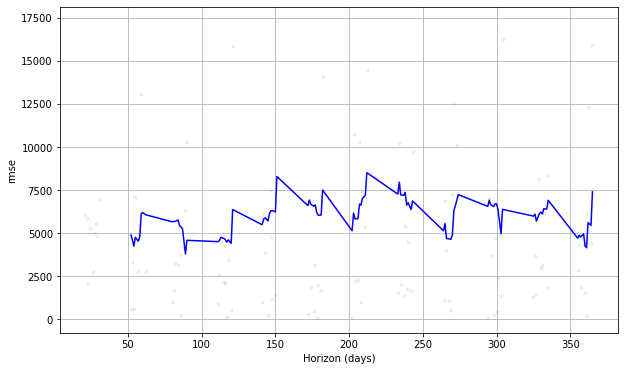

In [97]:
plot_cross_validation_metric(df_cv, metric='rmse'); #rmse for different horizons

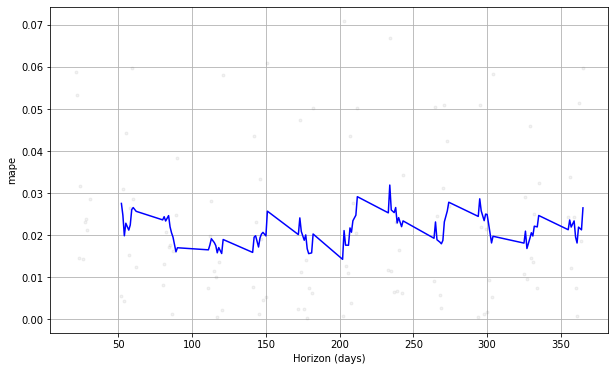

In [98]:
plot_cross_validation_metric(df_cv, metric='mape');

In [2]:
#Track change in the trend line using prophet

df = pd.read_csv('time_series/Data/HospitalityEmployees.csv')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [3]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


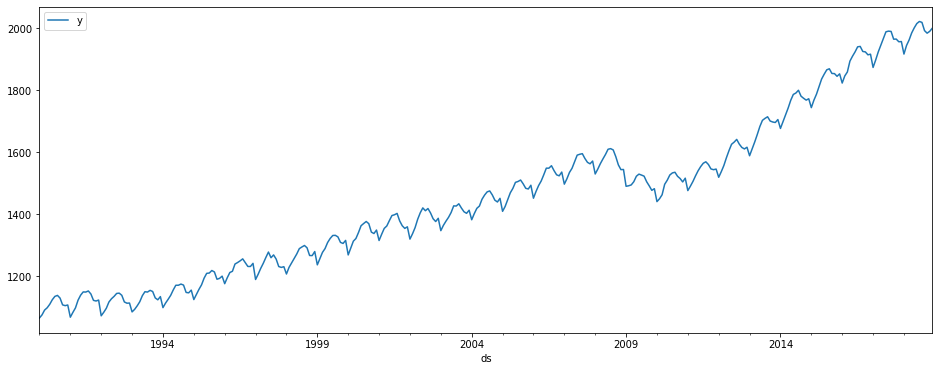

In [4]:
df.plot(x='ds', y='y', figsize=(16,6));

In [18]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
forecast.head(5)

18:33:18 - cmdstanpy - INFO - Chain [1] start processing
18:33:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1107.166479,1047.511823,1073.344909,1107.166479,1107.166479,-47.585799,-47.585799,-47.585799,-47.585799,-47.585799,-47.585799,0.0,0.0,0.0,1059.580681
1,1990-02-01,1107.685031,1061.347117,1087.769524,1107.685031,1107.685031,-33.123983,-33.123983,-33.123983,-33.123983,-33.123983,-33.123983,0.0,0.0,0.0,1074.561048
2,1990-03-01,1108.153400,1077.259670,1102.272987,1108.153400,1108.153400,-18.646524,-18.646524,-18.646524,-18.646524,-18.646524,-18.646524,0.0,0.0,0.0,1089.506875
3,1990-04-01,1108.671951,1093.190953,1118.943050,1108.671951,1108.671951,-2.988033,-2.988033,-2.988033,-2.988033,-2.988033,-2.988033,0.0,0.0,0.0,1105.683918
4,1990-05-01,1109.173775,1109.051148,1135.461703,1109.173775,1109.173775,13.326053,13.326053,13.326053,13.326053,13.326053,13.326053,0.0,0.0,0.0,1122.499828


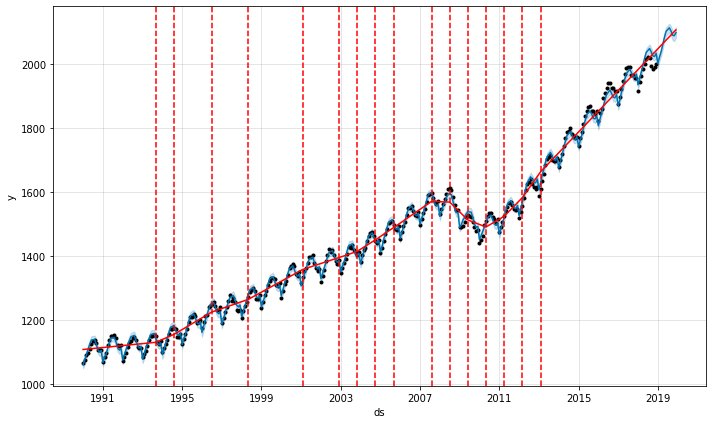

In [19]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [20]:
#Changing seasosnality from an additive component to a multiplicative component
df = pd.read_csv('time_series/Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


18:56:52 - cmdstanpy - INFO - Chain [1] start processing
18:56:52 - cmdstanpy - INFO - Chain [1] done processing


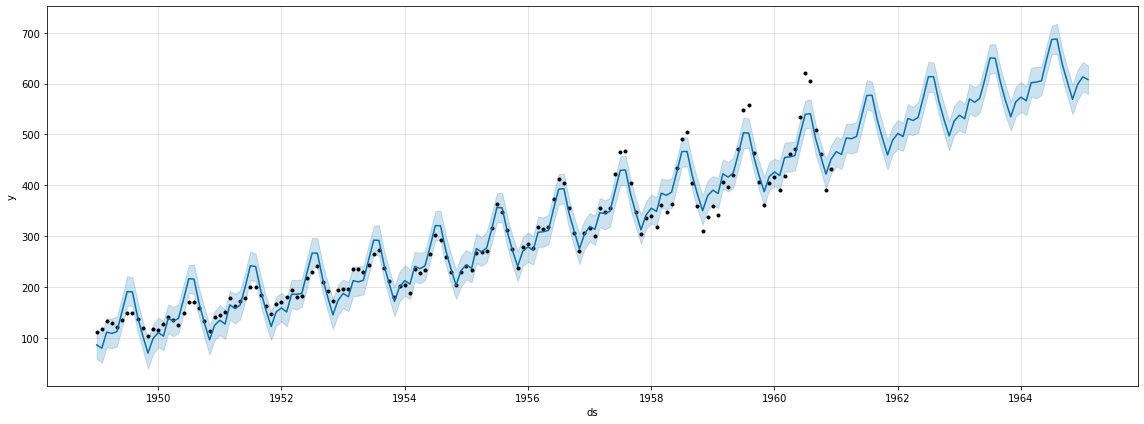

In [24]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
m  = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast, figsize=(16,6))

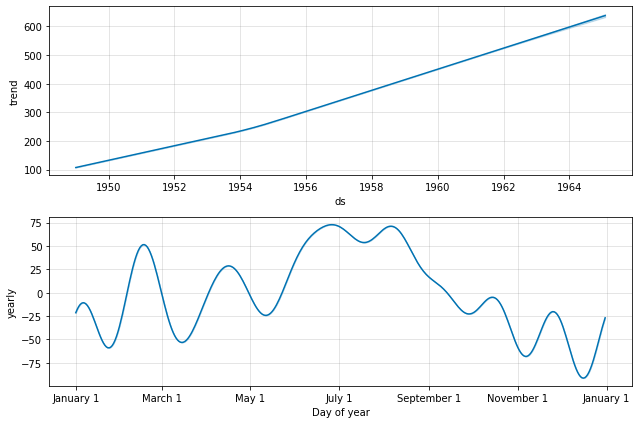

In [25]:
fig = m.plot_components(forecast);

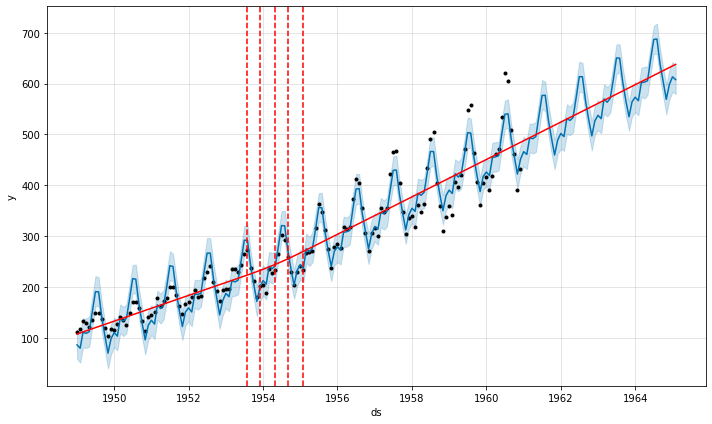

In [27]:
#for multiplicative seasonality
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m, forecast)

19:03:35 - cmdstanpy - INFO - Chain [1] start processing
19:03:36 - cmdstanpy - INFO - Chain [1] done processing


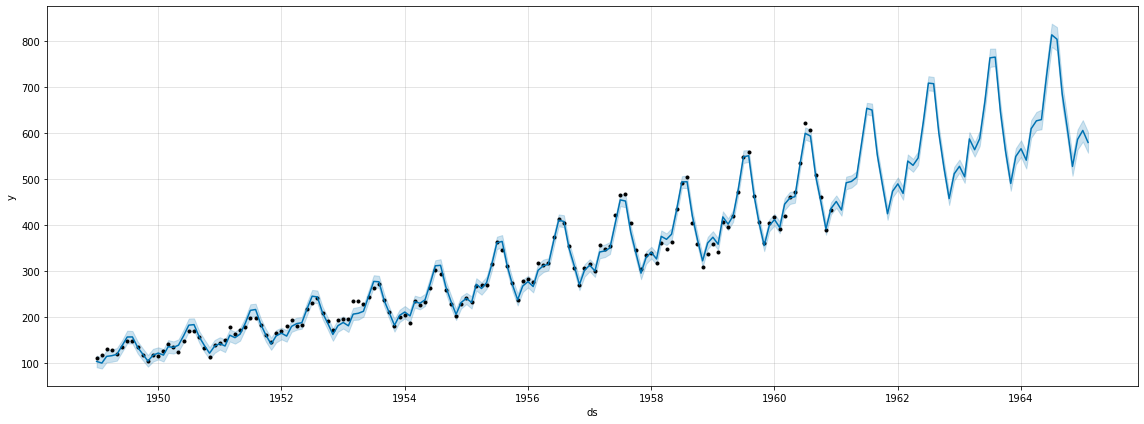

In [28]:
m  = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast, figsize=(16,6)) #Now trend and seasonality are changing with time

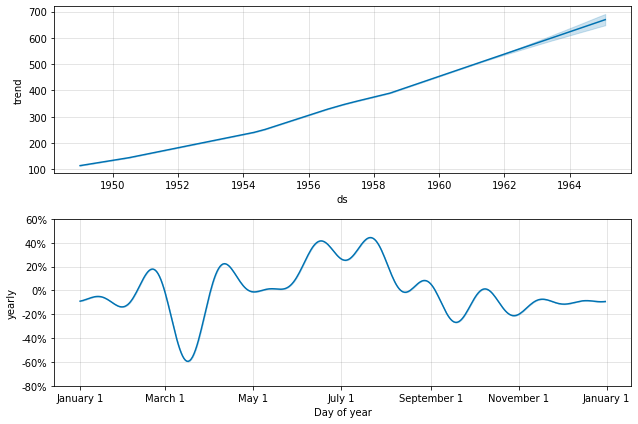

In [29]:
fig = m.plot_components(forecast);